# **DHILA PRITHA AMALIA**
# **24060122140117**
# **C1**

# **IMPORT LIBRARY**

In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('iris.csv')
print(data.shape)
print(data.head(200))

(150, 5)
     150    4  setosa  versicolor  virginica
0    5.1  3.5     1.4         0.2          0
1    4.9  3.0     1.4         0.2          0
2    4.7  3.2     1.3         0.2          0
3    4.6  3.1     1.5         0.2          0
4    5.0  3.6     1.4         0.2          0
..   ...  ...     ...         ...        ...
145  6.7  3.0     5.2         2.3          2
146  6.3  2.5     5.0         1.9          2
147  6.5  3.0     5.2         2.0          2
148  6.2  3.4     5.4         2.3          2
149  5.9  3.0     5.1         1.8          2

[150 rows x 5 columns]


# **Feature Selection**

In [6]:
# Memilih fitur ke-2 dan ke-3
X = data.iloc[:, [1, 2]].values  # Memilih kolom ke-2 dan ke-3
print("Fitur yang dipilih:")
print(X[:5])  # Menampilkan 5 baris pertama dari data


Fitur yang dipilih:
[[3.5 1.4]
 [3.  1.4]
 [3.2 1.3]
 [3.1 1.5]
 [3.6 1.4]]


Kode ini bertujuan untuk memilih fitur tertentu dari dataset untuk digunakan dalam proses analisis atau clustering. Dalam hal ini, fitur yang dipilih adalah kolom ke-2 dan ke-3 dari dataset (`data.iloc[:, [1, 2]].values`), menggunakan indexing berbasis lokasi dengan metode `.iloc` dari pandas. Metode ini memungkinkan seleksi kolom berdasarkan indeks posisi, di mana `1` dan `2` merujuk ke kolom ke-2 dan ke-3 (indeks berbasis nol). Setelah fitur dipilih, hasilnya disimpan ke dalam variabel `X`, yang kemudian diubah menjadi array numpy dengan `.values` untuk kompatibilitas dengan algoritma machine learning. Kode ini juga mencetak 5 baris pertama dari fitur yang dipilih menggunakan `print(X[:5])`, sehingga pengguna dapat memeriksa isi data sebelum digunakan lebih lanjut. Pemilihan fitur seperti ini penting dalam machine learning karena membantu fokus pada data yang relevan, mengurangi kompleksitas, dan meningkatkan efisiensi algoritma.

# **Clustering**

In [7]:
from sklearn.cluster import KMeans

# Inisialisasi model KMeans dengan 3 cluster
kmeans = KMeans(n_clusters=3, random_state=42)

# Melatih model dan mendapatkan cluster labels
kmeans.fit(X)
labels = kmeans.labels_

# Mendapatkan nilai centroid
centroids = kmeans.cluster_centers_

# Menampilkan hasil centroid
print("Posisi centroid:")
print(centroids)


Posisi centroid:
[[3.03255814 5.67209302]
 [3.428      1.462     ]
 [2.75087719 4.32807018]]


Kode tersebut menggunakan algoritma **K-Means Clustering** dari scikit-learn untuk mengelompokkan data menjadi tiga cluster. Model KMeans diinisialisasi dengan parameter `n_clusters=3` dan `random_state=42` untuk memastikan hasil yang konsisten. Setelah model dilatih dengan data (`X`) menggunakan `kmeans.fit(X)`, label cluster untuk setiap data disimpan di `kmeans.labels_`. Selain itu, koordinat centroid dari masing-masing cluster dihitung dan disimpan di `kmeans.cluster_centers_`. Hasil posisi centroid kemudian ditampilkan menggunakan fungsi `print`. Proses ini bertujuan untuk menemukan struktur cluster dalam data, di mana setiap cluster direpresentasikan oleh centroidnya.

# **Visualisasi Clustering**

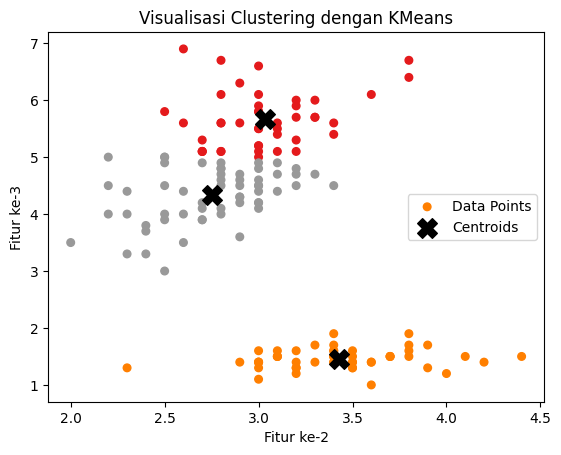

In [8]:
import matplotlib.pyplot as plt

# Plot data berdasarkan cluster
plt.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='Set1', label='Data Points')

# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')

# Menambahkan label, legend, dan judul
plt.xlabel("Fitur ke-2")
plt.ylabel("Fitur ke-3")
plt.title("Visualisasi Clustering dengan KMeans")
plt.legend()
plt.show()


Kode ini bertujuan untuk memvisualisasikan hasil clustering menggunakan scatter plot. Data poin dari cluster ditampilkan menggunakan `plt.scatter()` dengan warna yang berbeda untuk setiap cluster berdasarkan parameter `c=labels` dan colormap `cmap='Set1'`. Selain itu, centroid dari setiap cluster ditampilkan menggunakan `plt.scatter()` dengan warna hitam (`c='black'`), marker `X`, dan ukuran lebih besar (`s=200`) agar mudah dibedakan dari data poin. Label sumbu X, sumbu Y, dan judul plot ditambahkan untuk memberikan konteks, sementara `plt.legend()` digunakan untuk menampilkan legenda yang menjelaskan warna data poin dan centroid. Proses ini membantu memvisualisasikan distribusi data dalam cluster dan posisi centroid untuk interpretasi yang lebih mudah.

# **EVALUASI CLUSTERING DENGAN SSE**

In [9]:
from sklearn.cluster import KMeans

# Inisialisasi variabel untuk menyimpan hasil SSE
sse_values = []

# Loop untuk jumlah cluster dari 1 hingga 10
for n_clusters in range(1, 11):
    # Membuat model KMeans
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)

    # Melatih model pada data
    kmeans_model.fit(X)

    # Menyimpan nilai SSE (inertia) untuk jumlah cluster saat ini
    sse_values.append(kmeans_model.inertia_)
    print(f"Jumlah cluster: {n_clusters}, SSE: {kmeans_model.inertia_}")

# Menampilkan hasil secara keseluruhan
print("\nHasil SSE untuk berbagai jumlah cluster:")
print(sse_values)


Jumlah cluster: 1, SSE: 492.6323333333334
Jumlah cluster: 2, SSE: 86.31064765300054
Jumlah cluster: 3, SSE: 40.73707409220729
Jumlah cluster: 4, SSE: 27.610401971326176
Jumlah cluster: 5, SSE: 23.77066121145776
Jumlah cluster: 6, SSE: 19.62605102470054
Jumlah cluster: 7, SSE: 17.167753863519994
Jumlah cluster: 8, SSE: 15.31771134533388
Jumlah cluster: 9, SSE: 13.716718974546337
Jumlah cluster: 10, SSE: 12.043107591364306

Hasil SSE untuk berbagai jumlah cluster:
[492.6323333333334, 86.31064765300054, 40.73707409220729, 27.610401971326176, 23.77066121145776, 19.62605102470054, 17.167753863519994, 15.31771134533388, 13.716718974546337, 12.043107591364306]


Kode tersebut menghitung nilai SSE (**Sum of Squared Errors**) untuk berbagai jumlah cluster, dari 1 hingga 10, menggunakan algoritma **K-Means**. Variabel `sse_values` digunakan untuk menyimpan nilai SSE dari setiap model. Pada setiap iterasi dalam loop `for`, model KMeans dibuat dengan jumlah cluster yang berbeda (`n_clusters`), dilatih pada data `X` dengan `fit`, dan nilai SSE dihitung menggunakan atribut `inertia_`. Nilai ini kemudian disimpan ke dalam `sse_values` dan ditampilkan dengan jumlah cluster yang sesuai. Setelah loop selesai, seluruh nilai SSE untuk berbagai jumlah cluster dicetak, yang dapat digunakan untuk menentukan jumlah cluster optimal menggunakan metode **Elbow Method**.

In [10]:
from sklearn.metrics import silhouette_score

# Menghitung Silhouette Score untuk hasil clustering
silhouette_avg = silhouette_score(X, labels)

# Menampilkan hasil Silhouette Score
print(f"Silhouette Coefficient untuk clustering saat ini: {silhouette_avg:.4f}")


Silhouette Coefficient untuk clustering saat ini: 0.5933


# **ELBOW METHOD**

**1. IMPORT LIBRARY**

In [11]:
# Import library yang diperlukan
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Konfigurasi style plot
plt.style.use('ggplot')  # Menggunakan style 'ggplot' untuk plot


**2. HITUNG SSE BERBAGAI FITUR**

In [12]:
# Inisialisasi list untuk menyimpan SSE
sse_values = []
k_values = range(1, 11)  # Jumlah cluster dari 1 hingga 10

# Loop untuk menghitung SSE untuk setiap jumlah cluster
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')  # Menggunakan init 'k-means++'
    kmeans.fit(X)  # Melatih model KMeans
    sse_values.append(kmeans.inertia_)  # Menyimpan nilai SSE

# Menampilkan hasil SSE
print("SSE untuk setiap nilai k:", sse_values)


SSE untuk setiap nilai k: [492.6323333333334, 86.31064765300054, 40.73707409220729, 27.610401971326176, 23.77066121145776, 19.62605102470054, 17.167753863519994, 15.31771134533388, 13.716718974546337, 12.043107591364306]


**3. ELBOW METHOD**

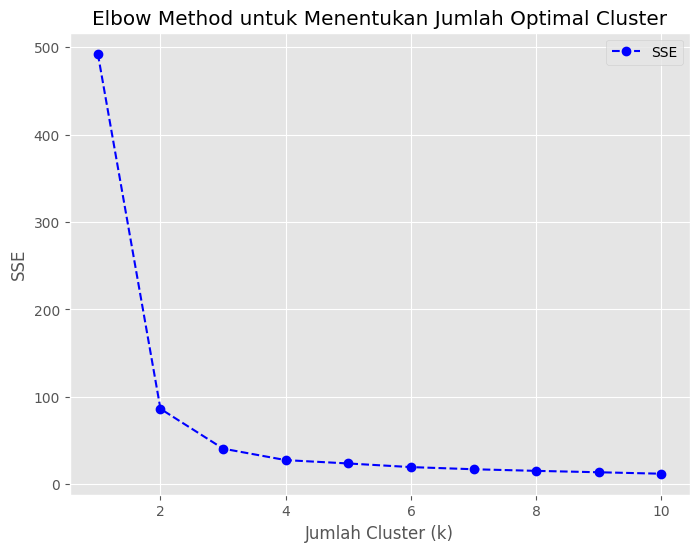

In [13]:
# Plot hasil SSE untuk Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_values, sse_values, marker='o', linestyle='--', color='b', label='SSE')

# Menambahkan label dan judul
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('SSE')
plt.title('Elbow Method untuk Menentukan Jumlah Optimal Cluster')
plt.legend()
plt.grid(True)
plt.show()


Kode tersebut menggunakan **Elbow Method** untuk menentukan jumlah cluster optimal dalam clustering dengan algoritma **K-Means**. Bagian pertama adalah mengimpor library yang diperlukan, termasuk `matplotlib` untuk visualisasi dan `KMeans` dari scikit-learn untuk model clustering. Selanjutnya, jumlah cluster (`k`) bervariasi dari 1 hingga 10, dan untuk setiap jumlah cluster, model KMeans dilatih pada data. Nilai SSE (Sum of Squared Errors) dihitung menggunakan atribut `inertia_` dan disimpan ke dalam `sse_values`. Terakhir, bagian visualisasi membuat plot Elbow Method, di mana sumbu X menunjukkan jumlah cluster, dan sumbu Y menunjukkan nilai SSE. Titik "elbow" pada grafik menunjukkan jumlah cluster optimal, yang ditandai oleh pengurangan nilai SSE yang mulai melambat. Proses ini membantu memilih jumlah cluster yang paling sesuai untuk dataset.

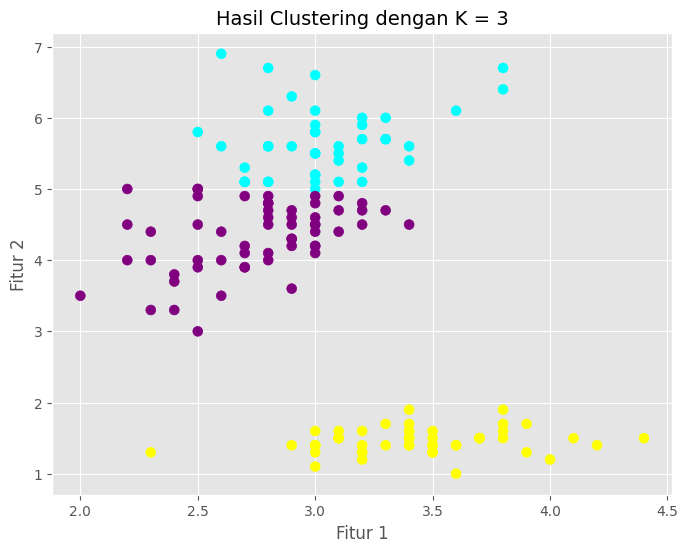

In [15]:
 # Menentukan jumlah cluster optimal
optimal_k = 3
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
labels_optimal = kmeans_optimal.fit_predict(X)

# Mendefinisikan warna untuk setiap cluster
CLUSTER_COLOR_MAP = {
    0: 'cyan',
    1: 'yellow',
    2: 'purple'
}

# Membuat list warna berdasarkan label cluster
cluster_colors = [CLUSTER_COLOR_MAP[label] for label in labels_optimal]

# Scatter plot untuk visualisasi hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_colors, s=50)

# Menambahkan label, judul, dan grid
plt.title("Hasil Clustering dengan K = 3", fontsize=14)
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.grid(True)
plt.show()


Kode tersebut memvisualisasikan hasil clustering untuk 3 cluster menggunakan algoritma **K-Means**. Model KMeans diinisialisasi dengan `optimal_k = 3` dan dilatih menggunakan data `X`. Hasil prediksi cluster disimpan dalam `labels_optimal`. Warna untuk setiap cluster didefinisikan dalam `CLUSTER_COLOR_MAP`, dan daftar warna untuk setiap titik data dibuat berdasarkan label cluster. Scatter plot dibuat menggunakan `plt.scatter()`, dengan warna yang sesuai untuk masing-masing cluster (`cyan`, `yellow`, `purple`) dan ukuran titik ditentukan oleh `s=50`. Plot dilengkapi dengan label sumbu, judul, dan grid untuk memberikan konteks yang lebih jelas. Visualisasi ini membantu memahami distribusi data dalam tiga cluster berdasarkan fitur yang digunakan.